# SimHash performance evaluation

## Software specifications

All test were done running the following programs (found below). Operation system Ubuntu 14.04 LTS 64 bit.

  Software  | Version | Link
  ------------- | -------------
  Ubuntu 64 bit | 14.04 LTS | http://www.ubuntu.com/
  blast+ local | 2.3.0+ | https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastDocs&DOC_TYPE=Download
  Simhash (C++) | 0.0.1 | None

  

## Hardware specifications

All tests and results were gain on PC with the specifications listed below.

  Hardware  | Specification
  ------------- | -------------
  CPU  | Intel(R) Core(TM) i5-4690K CPU @ 3.50 GHz
  Graphics card  | EVGA GeForce GTX 760
  Memory  | DDR3 8GB 1600 MHz
  HDD| Segagate 3 SATA TB/TO, 64MB Cache, 7200 RPM
  
  
  Graphic card details  | Specification
  ------------- | -------------
  CUDA cores  | 1152
  Base Clock  | 980 MHz
  Boost Clock  | 1033 MHz
  Memory  | 2048 MB GDDR5
  Memory Clock  | 6008 MHz
  Memory Bandwitch  | 192.2GB/s
  
  Hardware  | Cost (Amazon.com)
  ------------- | -------------
  Graphic card  | \$189.99
  CPU  | \$234.46 

## Initialise libraries

In [1]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

## Load the results

In [2]:
simhash_ENSP233_spooky_3 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Spooky_3_compare.csv')
simhash_ENSP233_native_3 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Native_3_compare.csv')

simhash_ENSP233_boost_2 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Boost_2_compare.csv')
simhash_ENSP233_boost_3 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Boost_3_compare.csv')
simhash_ENSP233_boost_4 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Boost_4_compare.csv')
simhash_ENSP233_boost_5 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Boost_5_compare.csv')

simhash_ENSP233_boost = pa.concat(
    [simhash_ENSP233_boost_2, simhash_ENSP233_boost_3, simhash_ENSP233_boost_4, simhash_ENSP233_boost_5])

simhash_ENSP233_window_3 = pa.concat(
    [simhash_ENSP233_spooky_3, simhash_ENSP233_native_3, simhash_ENSP233_boost_3])

simhash_ENSP1008_boost_3 = pa.read_csv('../blast_comparison/ENSP1008/ENSP1008_Boost_3_compare.csv')
simhash_ENSP1146_boost_3 = pa.read_csv('../blast_comparison/ENSP1146/ENSP1146_Boost_3_compare.csv')

## Date exploration

In [3]:
# Plot all graphs inside the notebook
%matplotlib inline

simhash_ENSP1146_boost_3.head()

,window_size,hash,ham_distance,similarity,error,blast_output
0,3,Boost,11,82.8125,14.8475,97.66
1,3,Boost,10,84.3750,12.8950,97.27
2,3,Boost,10,84.3750,12.8950,97.27
3,3,Boost,10,84.3750,12.6950,97.07
4,3,Boost,9,85.9375,11.1325,97.07


## Performance

In [4]:
# Configure crahps
sns.set(font_scale=1.2)
sns.set(style="ticks")

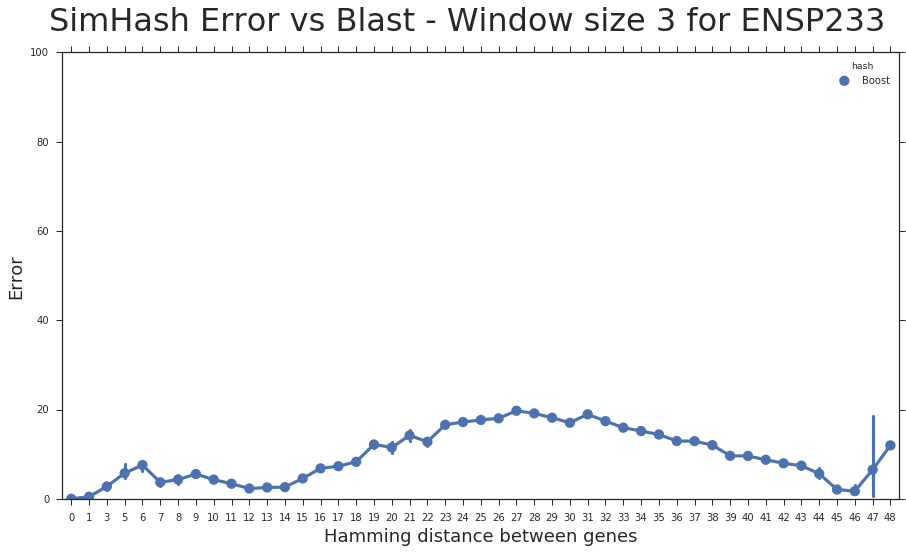

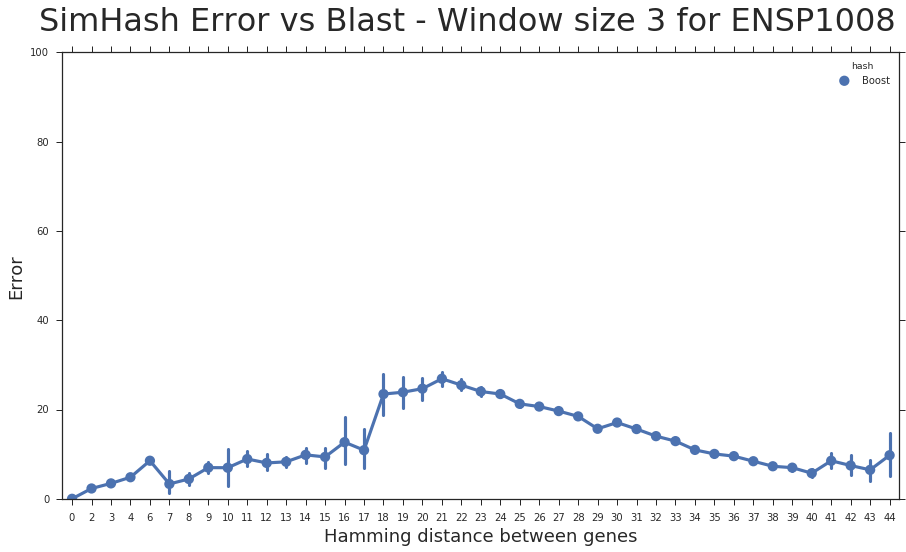

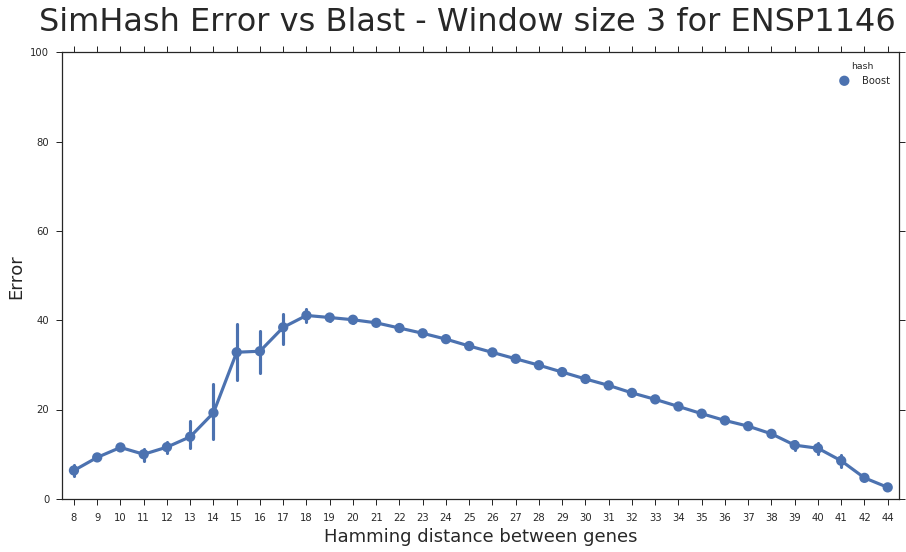

In [6]:
plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="hash", data=simhash_ENSP233_boost_3,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Window size 3 for ENSP233", fontsize = 32)
plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Window size 3 for ENSP233.png")

plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="hash", data=simhash_ENSP1008_boost_3,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Window size 3 for ENSP1008", fontsize = 32)
plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Window size 3 for ENSP1008.png")

plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="hash", data=simhash_ENSP1146_boost_3,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Window size 3 for ENSP1146", fontsize = 32)
plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Window size 3 for ENSP1146.png")

## SimHash sliding window evalution

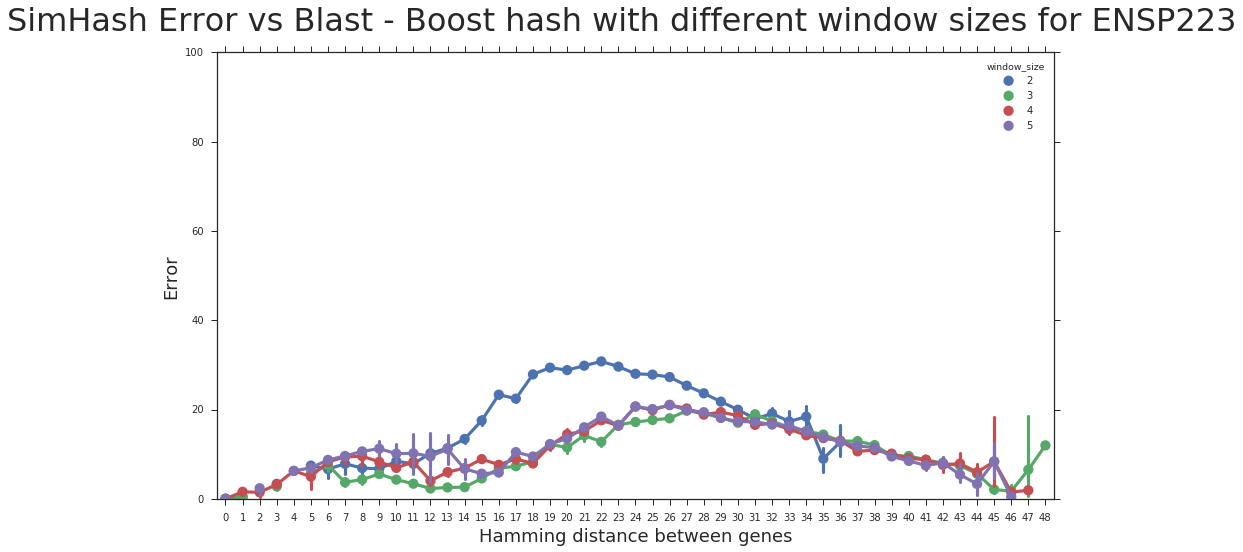

In [7]:
plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="window_size", data=simhash_ENSP233_boost,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Boost hash with different window sizes for ENSP223", fontsize = 32)
plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Boost hash with different window sizes for ENSP223")

## SimHash hash function evaluation

Hash functions Spooky and Boost give the same results, which can be seen from the graph.

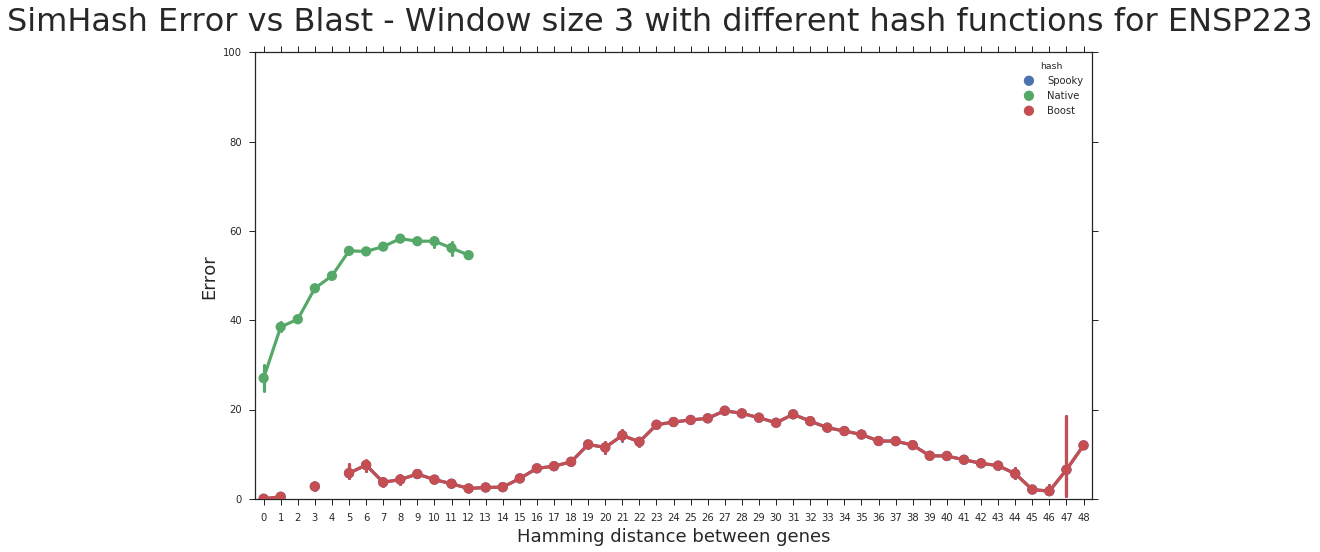

In [8]:
plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="hash", data=simhash_ENSP233_window_3,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Window size 3 with different hash functions for ENSP223", fontsize = 32)
plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Window size 3 with different hash functions for ENSP223")